RandomForest Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("D:\\HK2 (NĂM 3)\\OLAP\\PROJECT\\DATA\\global_superstore_2016.csv", encoding='latin1')

In [3]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.2500,25645.500,38467.750,51290.00
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.0000,56430.500,90008.000,99301.00
Sales,51290.0,246.490685,487.565388,0.440,30.7625,85.055,251.055,22638.48
Quantity,51290.0,3.476545,2.278766,1.000,2.0000,3.000,5.000,14.00
Discount,51290.0,0.142908,0.212280,0.000,0.0000,0.000,0.200,0.85
Profit,51290.0,28.610970,174.341066,-6599.980,0.0000,9.240,36.810,8399.98
Shipping Cost,51290.0,26.478567,57.251373,1.002,2.6100,7.790,24.450,933.57


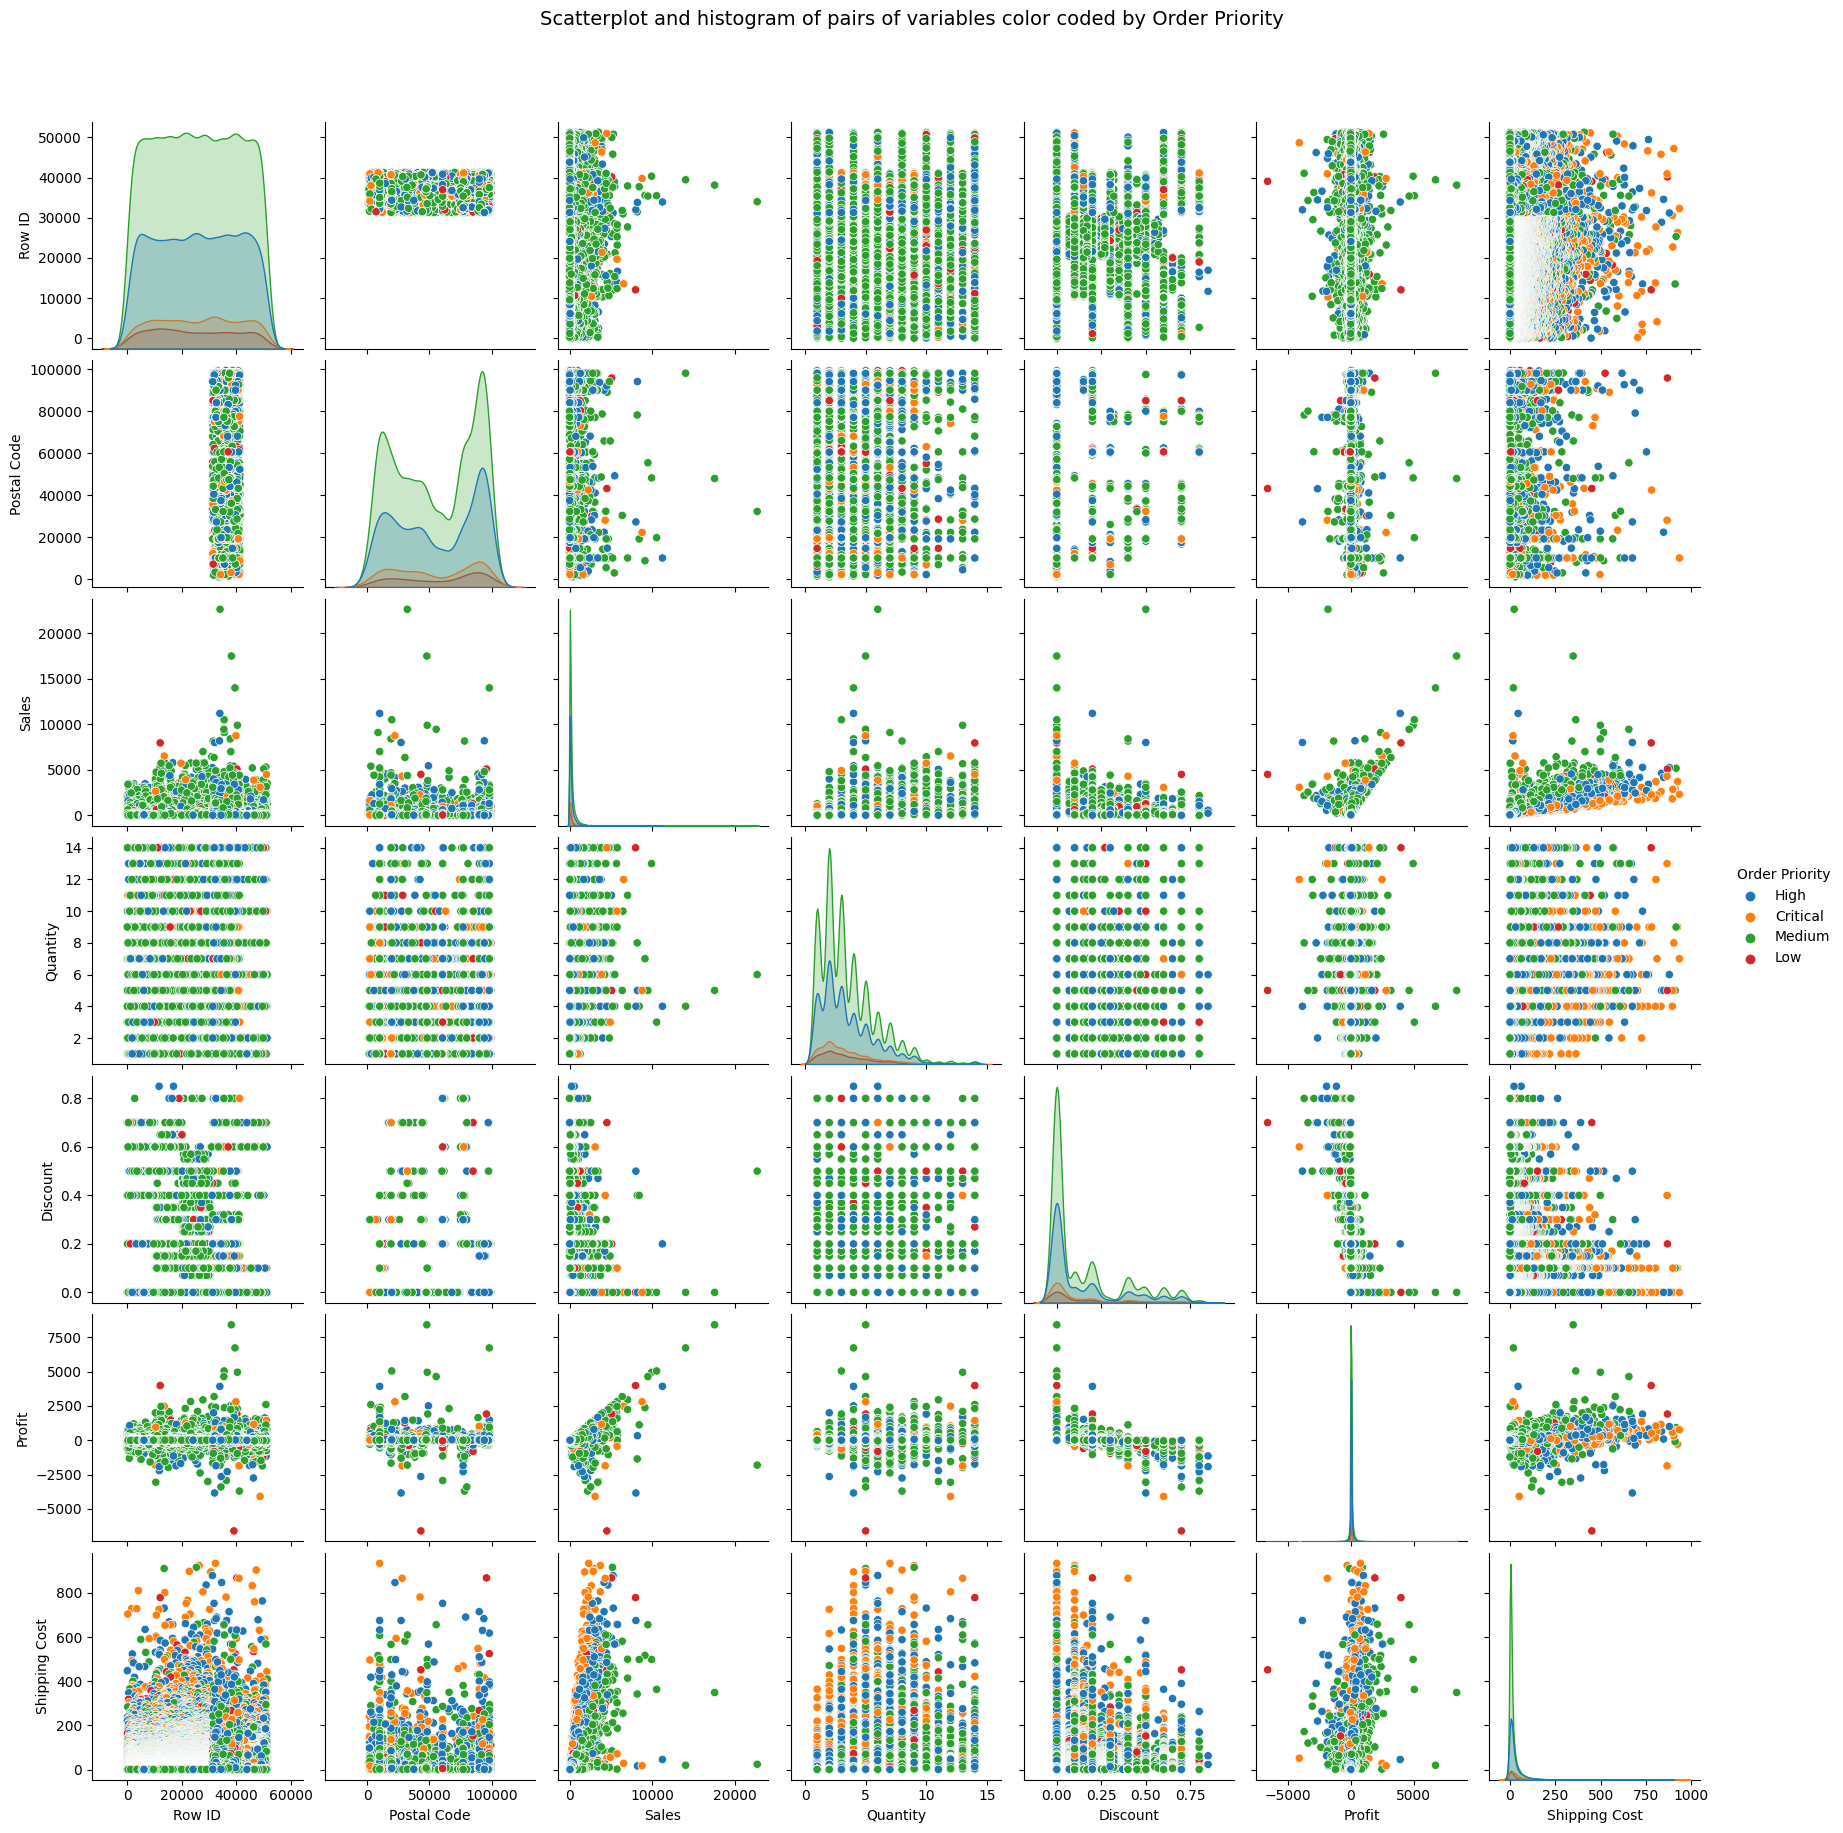

In [6]:
g = sns.pairplot(dataset, hue='Order Priority')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by Order Priority", 
               fontsize = 14, # defining the size of the title
               y=1.05); # y = defining title y position (height)

In [7]:
dataset['Order Priority'].unique()

array(['High', 'Critical', 'Medium', 'Low'], dtype=object)

In [8]:
dataset['Order Priority'] = dataset['Order Priority'].replace('High', 0).replace('Critical', 1).replace('Medium', 2).replace('Low', 3)

In [9]:
y = dataset['Order Priority']
X = dataset[['Quantity','Discount','Profit','Shipping Cost']]

In [10]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1, 
                             max_depth=2,
                             random_state=SEED)

In [12]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


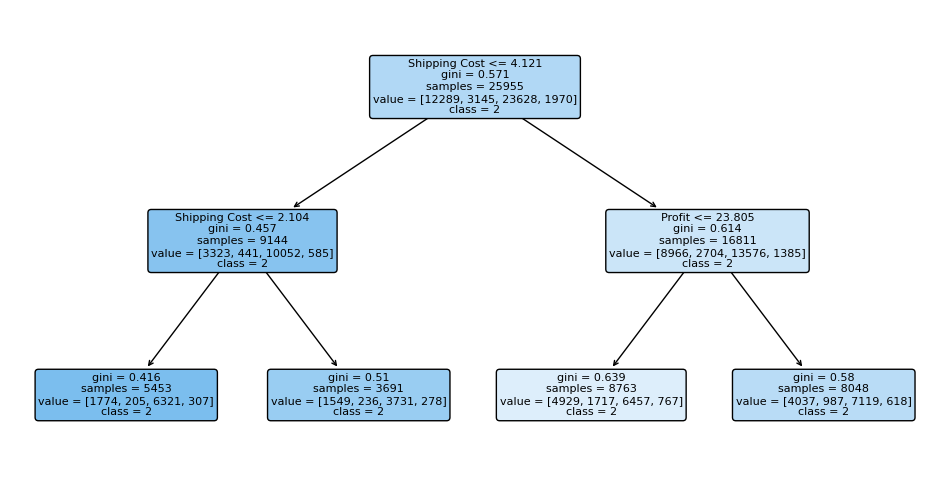

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


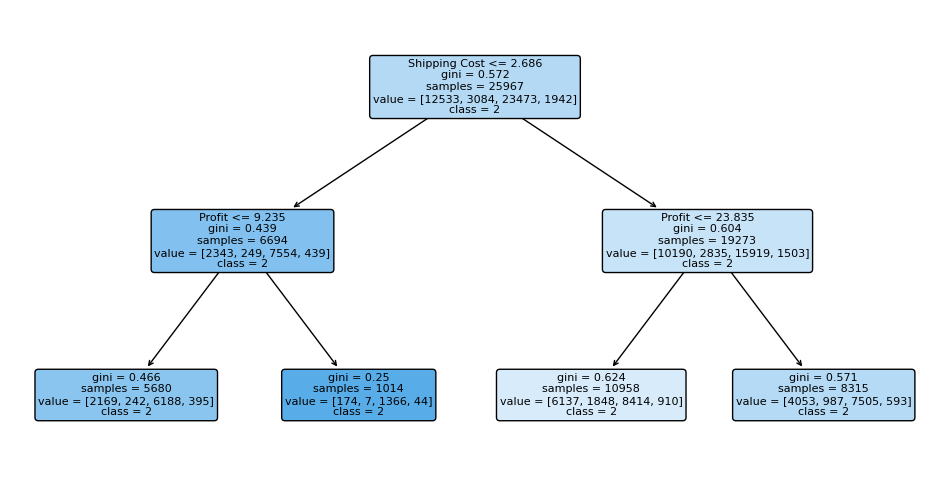

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


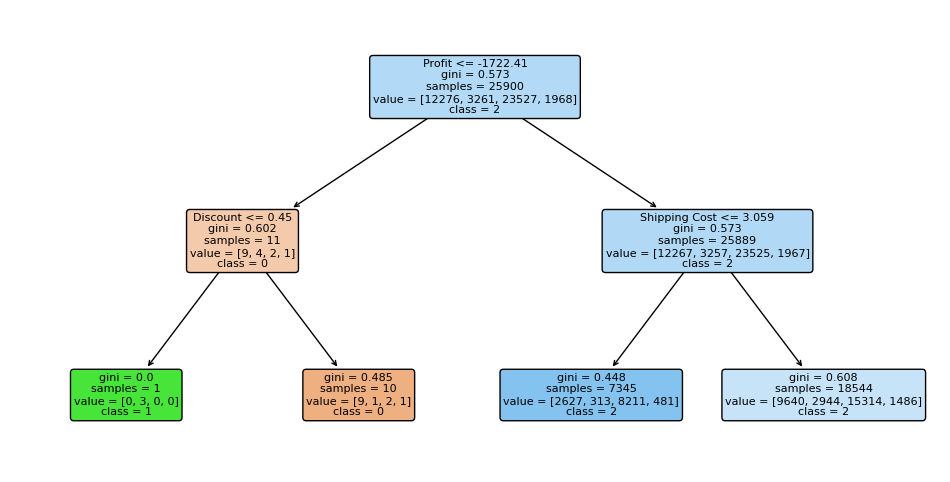

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=787846414)


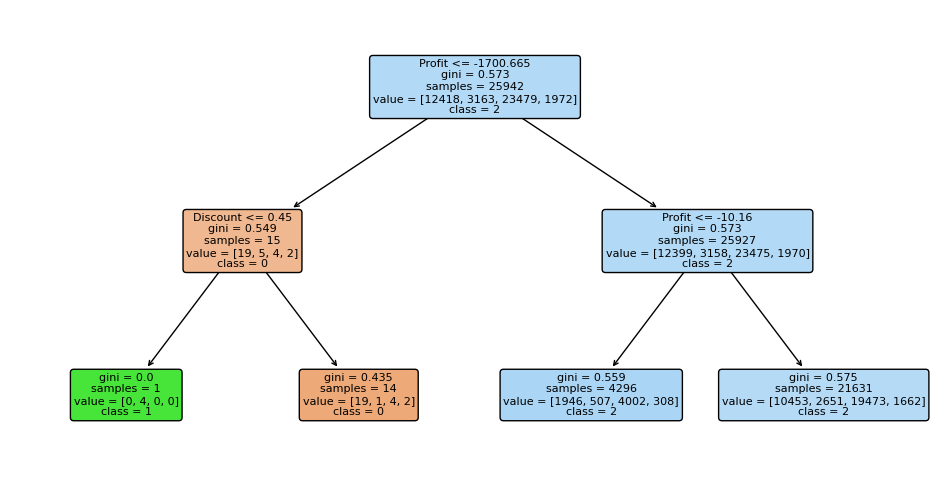

In [13]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.43      0.00      0.00      3055
           1       0.00      0.00      0.00       799
           2       0.58      1.00      0.73      5934
           3       0.00      0.00      0.00       470

    accuracy                           0.58     10258
   macro avg       0.25      0.25      0.18     10258
weighted avg       0.46      0.58      0.42     10258



c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

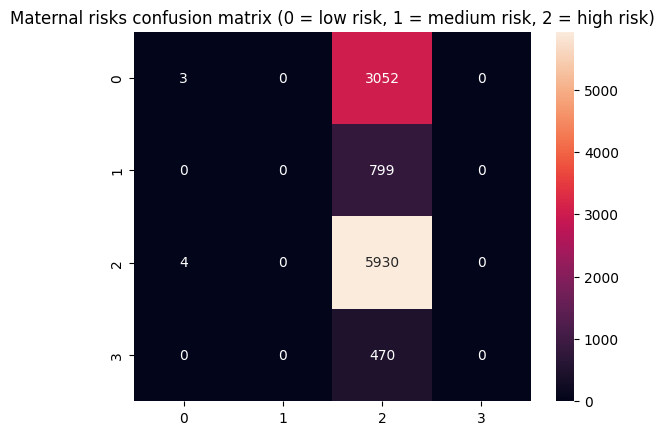

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

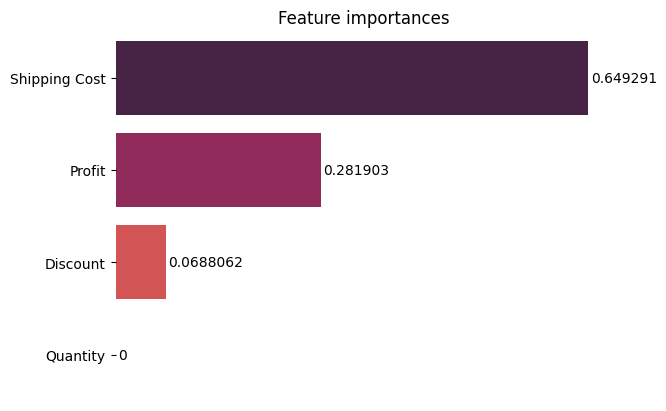

In [15]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [16]:
rfc_ = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.42      0.13      0.20      3055
           1       0.59      0.01      0.02       799
           2       0.61      0.95      0.74      5934
           3       0.00      0.00      0.00       470

    accuracy                           0.59     10258
   macro avg       0.40      0.27      0.24     10258
weighted avg       0.52      0.59      0.49     10258



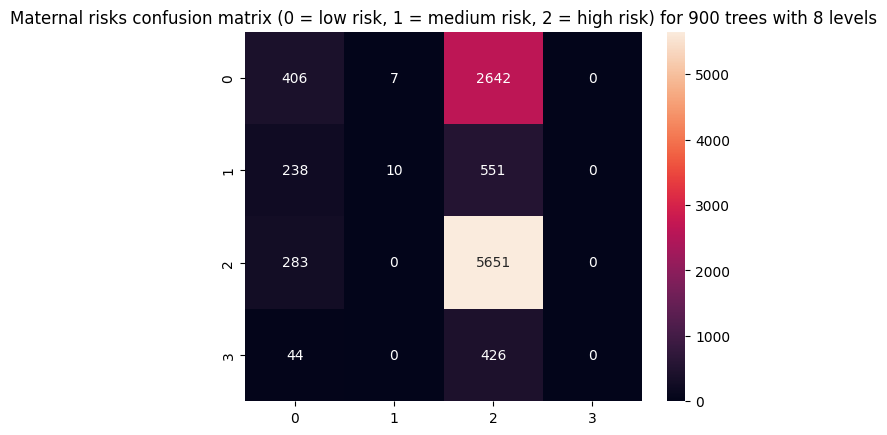

In [17]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))

In [18]:
data = pd.DataFrame(X,columns=['Quantity','Discount','Profit','Shipping Cost'])
data
data.to_csv('a.csv')